<a href="https://colab.research.google.com/github/meersajid/colabs/blob/main/FAI_Lecture01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00


In [ ]:
from fastbook import *

In [ ]:
searches = ['flower', 'hat']
path = Path('/content/hat_or_not')

if path.exists():
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo', max_images=200)
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)


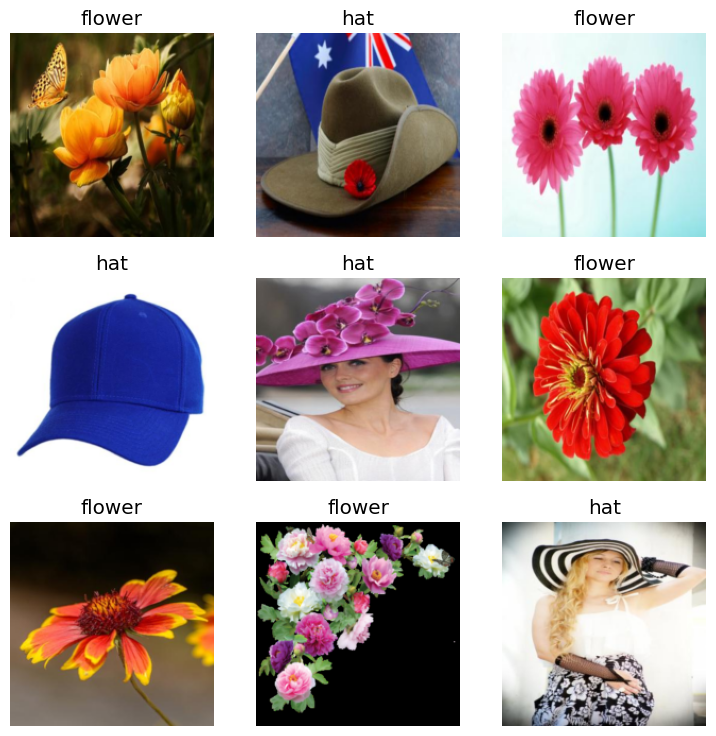

In [6]:
dls.show_batch(max_n=9)

In [7]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 71.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.963085,0.049700,0.026667,00:02


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,0.200587,0.035488,0.013333,00:01
1,0.114003,0.024468,0.013333,00:01
2,0.082564,0.019663,0.013333,00:01


This is a: hat.
Probability its a hat: tensor([0.0766, 0.9234])


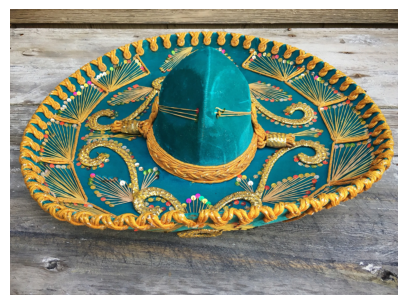

In [12]:
img = PILImage.create('/content/hat.jpg')
img.show()
is_hat,_,probs = learn.predict(img)
print(f'This is a: {is_hat}.')
print(f'Probability its a hat: {probs}')

This is a: hat.
Probability its a hat: tensor([0.1766, 0.8234])


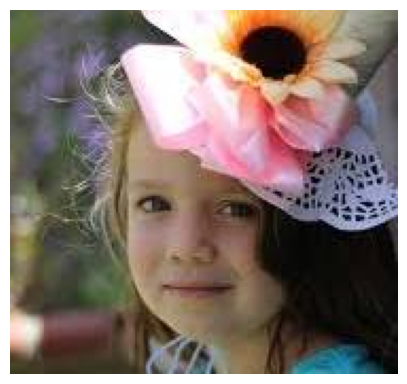

In [13]:
img = PILImage.create('/content/flowery_hat.jpeg')
img.show()
is_hat,_,probs = learn.predict(PILImage.create(img))
print(f'This is a: {is_hat}.')
print(f'Probability its a hat: {probs}')